## Code: https://github.com/hunkim/PyTorchZeroToAll
## Slides: http://bit.ly/PyTorchZeroAll
## Videos: http://bit.ly/PyTorchVideo

## Wide and Deep 

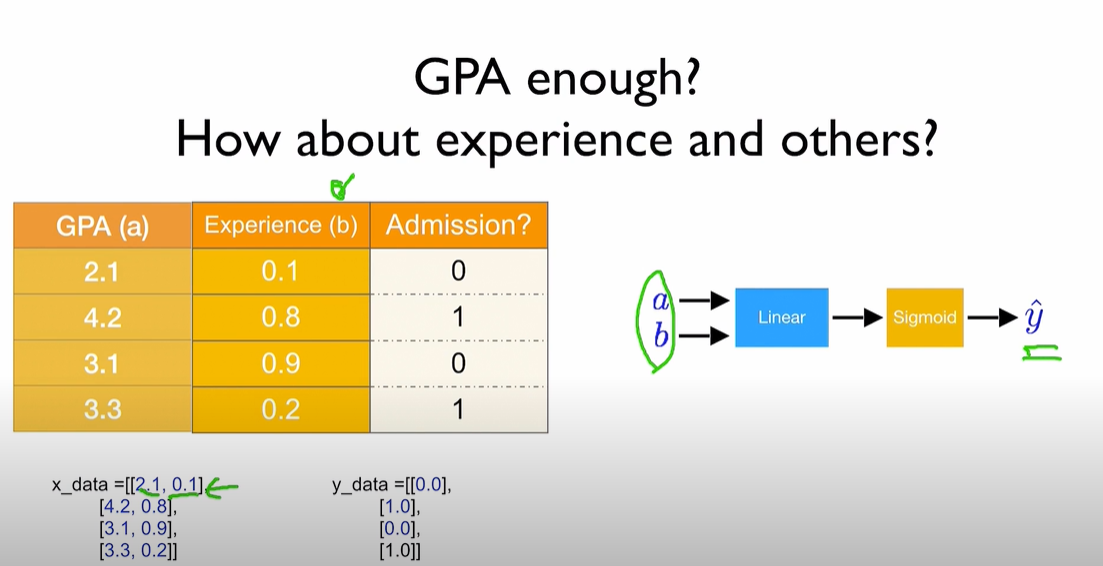

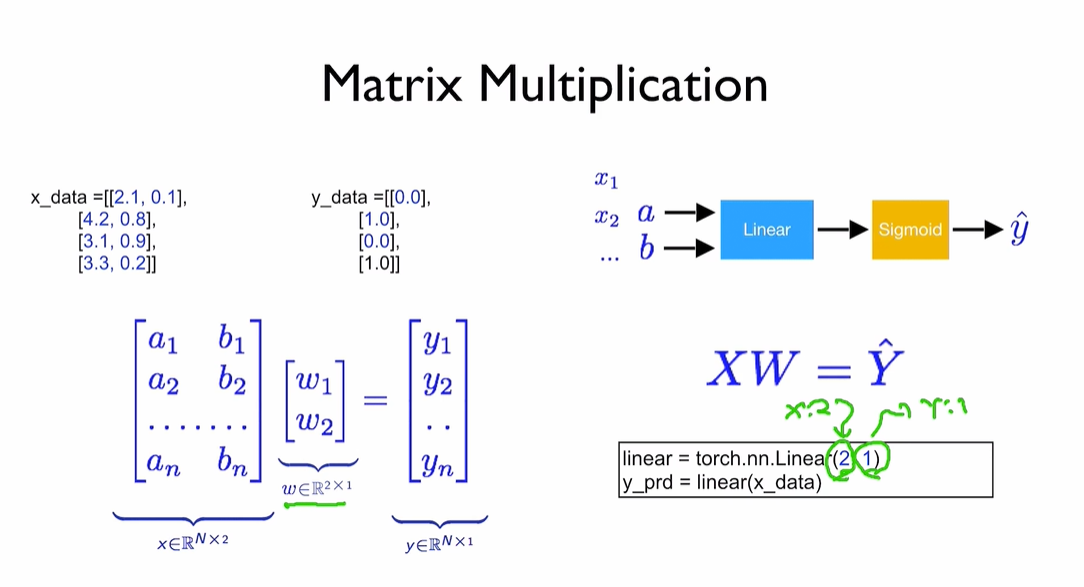

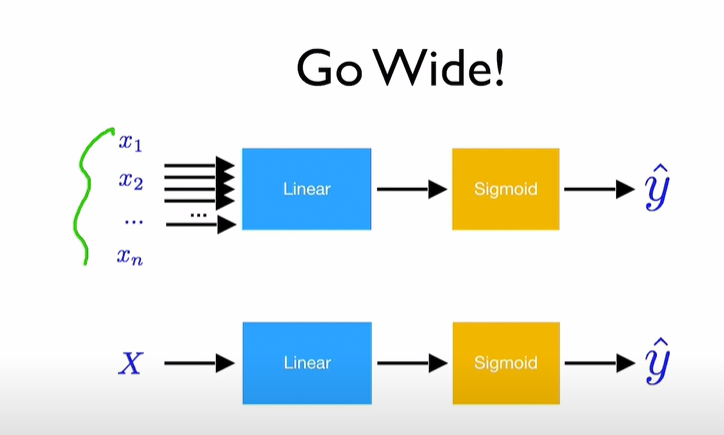

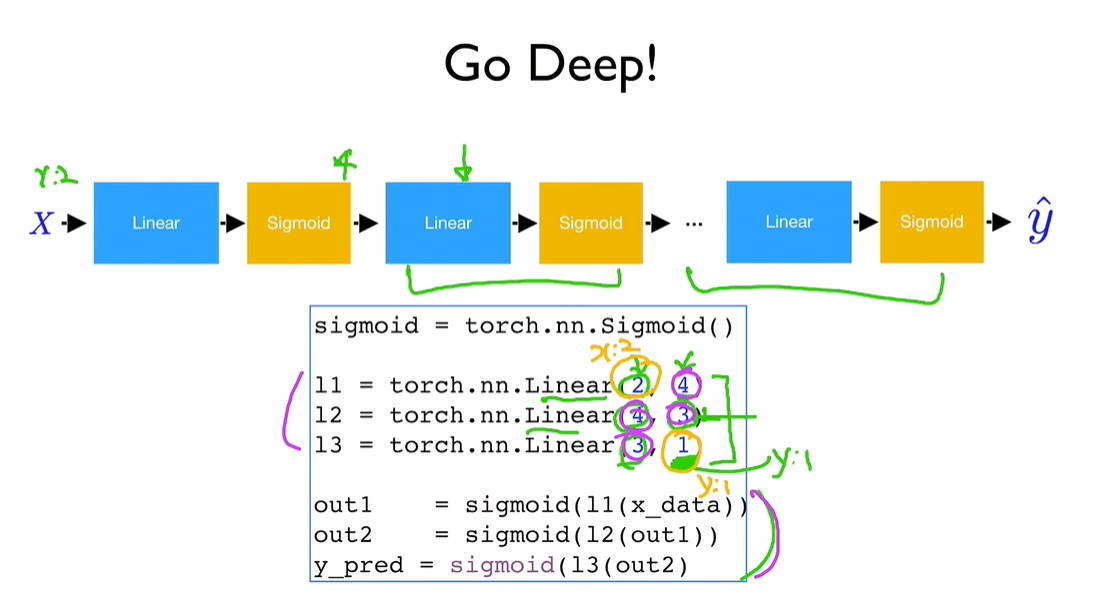

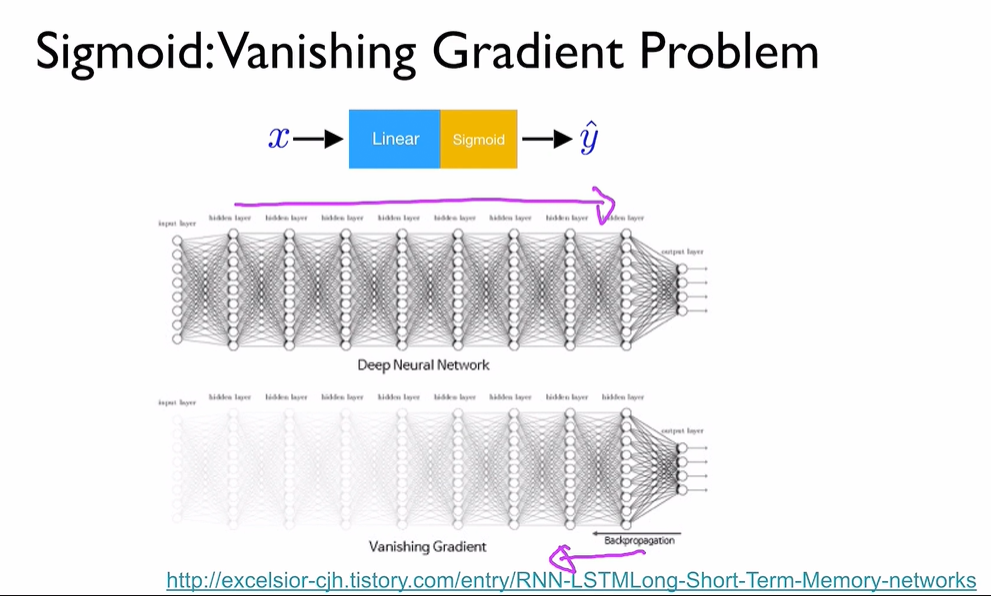

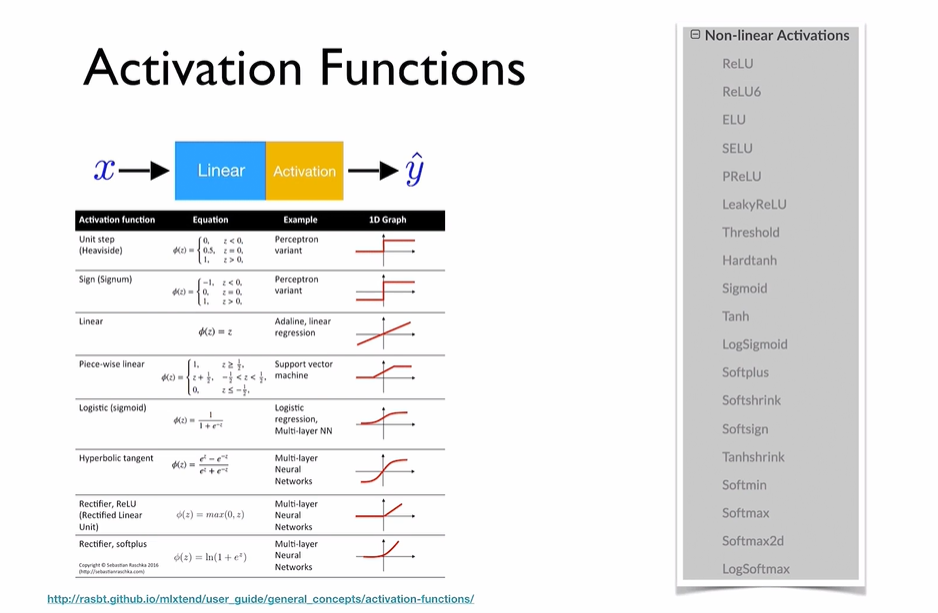

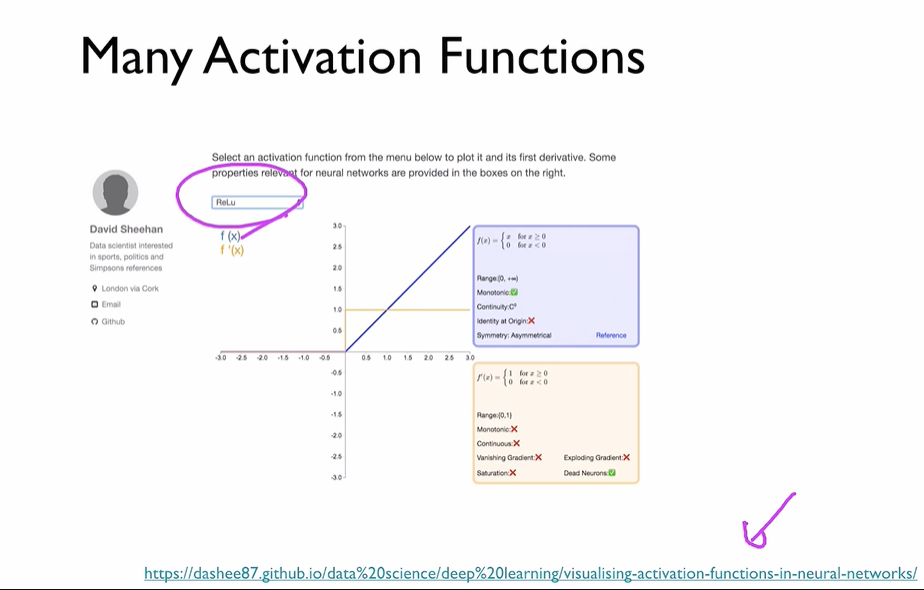

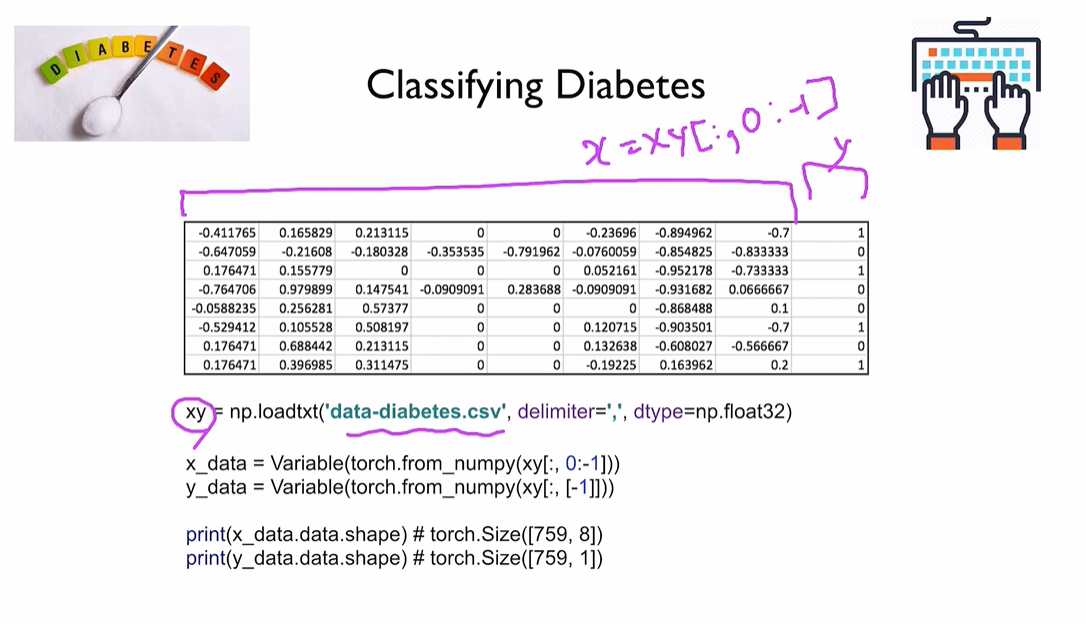

In [5]:
from torch import nn, optim, from_numpy
import numpy as np
import matplotlib.pyplot as plt


xy = np.loadtxt('/content/diabetes.csv', delimiter=',', dtype=np.float32)
x_data = from_numpy(xy[:, 0:-1])
y_data = from_numpy(xy[:, [-1]])
print(f'X\'s shape: {x_data.shape} | Y\'s shape: {y_data.shape}')


class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = nn.Linear(8, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred


# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.1)

# Training loop
for epoch in range(100):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch + 1}/100 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


X's shape: torch.Size([759, 8]) | Y's shape: torch.Size([759, 1])
Epoch: 1/100 | Loss: 0.7422
Epoch: 2/100 | Loss: 0.6792
Epoch: 3/100 | Loss: 0.6486
Epoch: 4/100 | Loss: 0.6461
Epoch: 5/100 | Loss: 0.6578
Epoch: 6/100 | Loss: 0.6658
Epoch: 7/100 | Loss: 0.6647
Epoch: 8/100 | Loss: 0.6579
Epoch: 9/100 | Loss: 0.6497
Epoch: 10/100 | Loss: 0.6436
Epoch: 11/100 | Loss: 0.6412
Epoch: 12/100 | Loss: 0.6418
Epoch: 13/100 | Loss: 0.6437
Epoch: 14/100 | Loss: 0.6450
Epoch: 15/100 | Loss: 0.6446
Epoch: 16/100 | Loss: 0.6423
Epoch: 17/100 | Loss: 0.6386
Epoch: 18/100 | Loss: 0.6345
Epoch: 19/100 | Loss: 0.6308
Epoch: 20/100 | Loss: 0.6280
Epoch: 21/100 | Loss: 0.6256
Epoch: 22/100 | Loss: 0.6228
Epoch: 23/100 | Loss: 0.6185
Epoch: 24/100 | Loss: 0.6123
Epoch: 25/100 | Loss: 0.6047
Epoch: 26/100 | Loss: 0.5968
Epoch: 27/100 | Loss: 0.5897
Epoch: 28/100 | Loss: 0.5834
Epoch: 29/100 | Loss: 0.5764
Epoch: 30/100 | Loss: 0.5676
Epoch: 31/100 | Loss: 0.5581
Epoch: 32/100 | Loss: 0.5498
Epoch: 33/100 |